In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import datetime
import yfinance as yf

In [3]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2023, 12, 31)
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


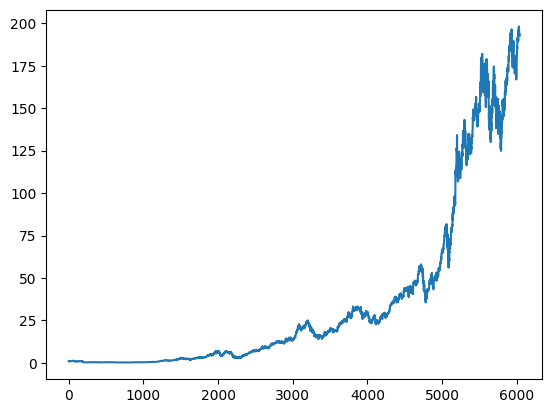

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
6032,195.179993,195.410004,192.970001,193.600006,37122800
6033,193.610001,193.889999,192.830002,193.050003,28919300
6034,192.490005,193.500000,191.089996,193.149994,48087700
6035,194.139999,194.660004,193.169998,193.580002,34049900


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    181.768301
6033    181.787101
6034    181.898701
6035    182.046001
6036    182.173301
Name: Close, Length: 6037, dtype: float64

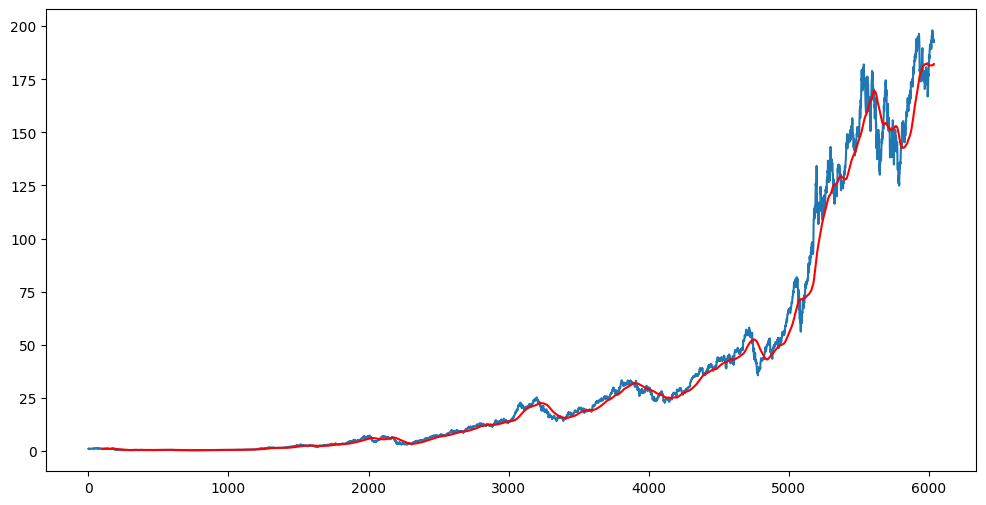

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    178.649100
6033    178.871851
6034    179.085250
6035    179.290201
6036    179.487900
Name: Close, Length: 6037, dtype: float64

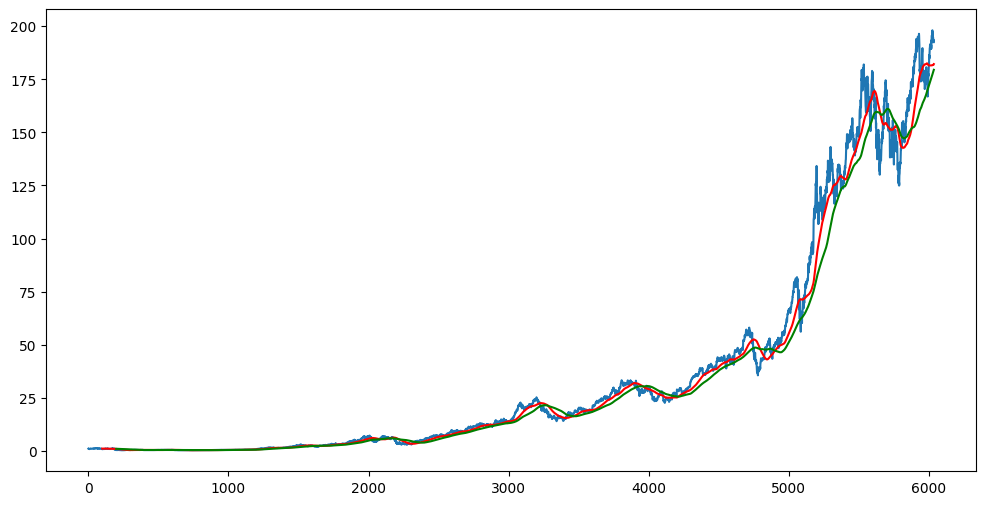

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(6037, 5)

In [17]:
# Splitting data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4225, 1)
(1812, 1)


In [18]:
data_training.head()

,Close
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [19]:
data_testing.head()

,Close
4225,29.367500
4226,29.280001
4227,29.264999
4228,29.150000
4229,29.412500


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.87869415],
       [0.88361601],
       [0.88301028]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(4125, 100, 1)

In [ ]:
# ML Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
129/129 [==============================] - 43s 255ms/step - loss: 0.0158
Epoch 2/50
129/129 [==============================] - 34s 263ms/step - loss: 0.0047
Epoch 3/50
129/129 [==============================] - 34s 261ms/step - loss: 0.0045
Epoch 4/50
129/129 [==============================] - 33s 256ms/step - loss: 0.0039
Epoch 5/50
129/129 [==============================] - 34s 260ms/step - loss: 0.0038
Epoch 6/50
129/129 [==============================] - 33s 253ms/step - loss: 0.0037
Epoch 7/50
129/129 [==============================] - 34s 265ms/step - loss: 0.0036
Epoch 8/50
129/129 [==============================] - 32s 251ms/step - loss: 0.0035
Epoch 9/50
129/129 [==============================] - 34s 265ms/step - loss: 0.0032
Epoch 10/50
129/129 [==============================] - 32s 251ms/step - loss: 0.0033
Epoch 11/50
129/129 [==============================] - 33s 255ms/step - loss: 0.0031
Epoch 12/50
129/129 [==============================] - 37s 282ms/step - lo

In [43]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
data_testing.head()

,Close
4225,29.367500
4226,29.280001
4227,29.264999
4228,29.150000
4229,29.412500


In [27]:
past_100_days = data_training.tail(100)

In [28]:
from typing import final
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,25.102501
1,25.087500
2,24.965000
3,24.615000
4,24.430000


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01195032],
       [0.01186465],
       [0.01116505],
       ...,
       [0.97167329],
       [0.97412908],
       [0.96813249]])

In [31]:
input_data.shape

(1912, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1812, 100, 1)
(1812,)


In [34]:
# making predictions

y_predicted = model.predict(x_test)

57/57 [==============================] - 5s 82ms/step


In [35]:
y_predicted.shape

(1812, 1)

In [36]:
y_predicted

array([[0.07807203],
       [0.07861887],
       [0.07917883],
       ...,
       [0.95598793],
       [0.95468163],
       [0.9532155 ]], dtype=float32)

In [38]:
scaler.scale_

array([0.00571102])

In [39]:
scale_factor = 1/0.0209951
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

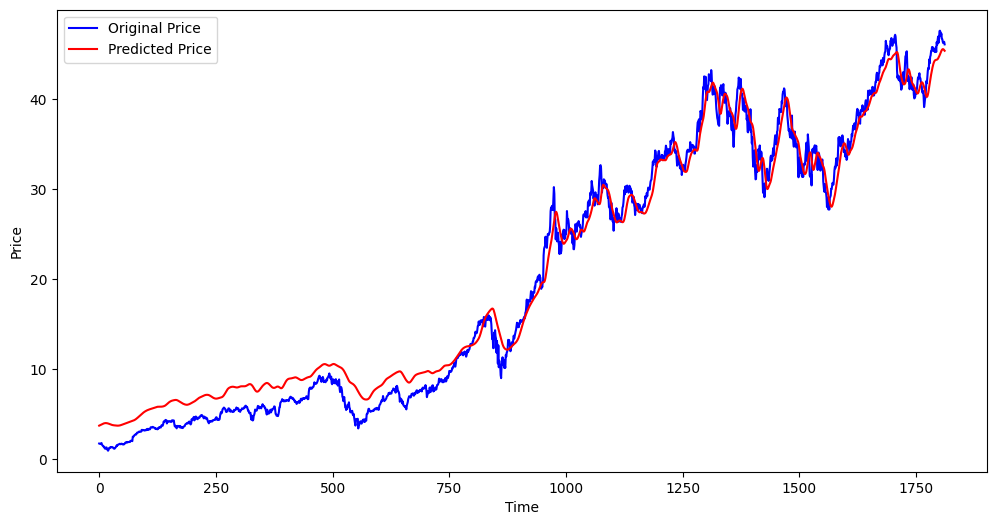

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()